# Pymaceuticals Inc.
---

### Analysis

1. The analysis is based on the data of 10 drug regimen tested over 248 mice, out of which 51% are male and 49% are female.
2. From the bar graphs, Capomulin and Ramicane has the highest observed timepoints
3. Box and whisker plot shows that Capomulin and Ramicane has the lowest final tumor volume compared to Infubinol and Ceftamin indicating high performance on the tumor.
4. From the Scatterplot and linear regression analysis indicates a postive correlation between mouse weigh and tumor volume indicating that as weight increases tumor volume also tends to increase.
2. Out of the 4 drug regimen considered, Infubinol has a potential outlier meaning the result may not be accurate.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how = "left" )

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = merged_data["Mouse ID"].unique()
len(number_of_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_data = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()

duplicate_data

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data.loc[merged_data["Mouse ID"] == "g989"]

duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_data.drop(duplicate_mouse_data.index)

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_num_of_mice = clean_df["Mouse ID"].value_counts()

len(new_num_of_mice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()
tumor_std = drug_regimen["Tumor Volume (mm3)"].std()
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()

In [8]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Value": tumor_mean,
                                   "Median Tumor Volume": tumor_median,
                                   "Tumor Volume Variance":tumor_variance,
                                   "Tumor Volume Std. Dev.":tumor_std,
                                   "Tumor Volume Std. Err.":tumor_sem})

summary_statistics

,Mean Tumor Value,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean',
                                                                                'median', 'var', 'std', 'sem'])

summary_aggregate


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

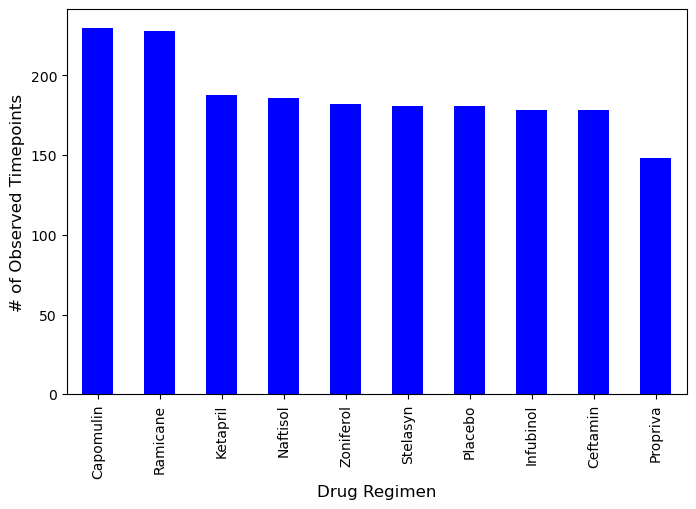

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import numpy as np

mice_drug= clean_df["Drug Regimen"].value_counts()

pd_bar = mice_drug.plot(kind="bar", figsize=(8,5), color="blue", align= "center")

pd_bar.set_xlabel("Drug Regimen", fontsize= 12)
pd_bar.set_ylabel("# of Observed Timepoints", fontsize= 12)

plt.show()

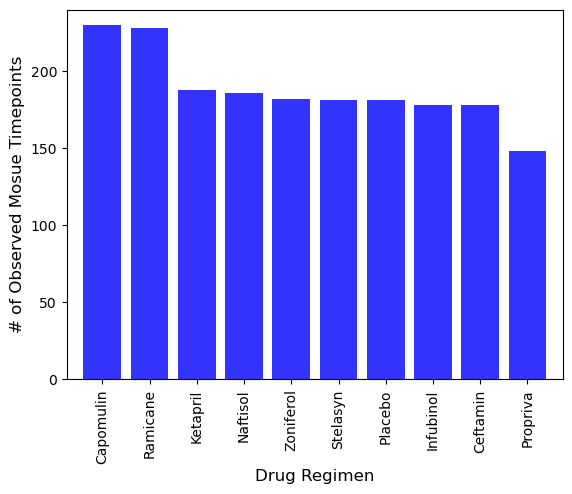

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#setting x_axis and y_axis
x_axis = mice_drug.index
y_axis = mice_drug.values

plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Observed Mosue Timepoints", fontsize=12)
plt.xlim(-.75,len(x_axis)-0.25)
plt.ylim(0,max(y_axis)+10)
plt.show()


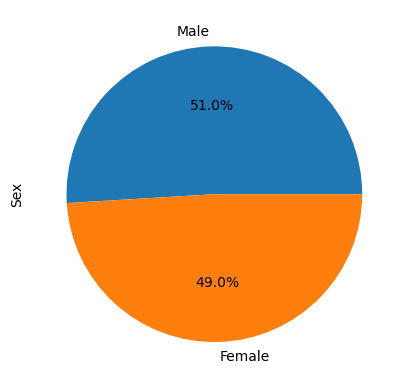

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
pd_pie = gender_data.plot(kind="pie",autopct ="%.1f%%")
pd_pie.set_ylabel("Sex")

plt.show()


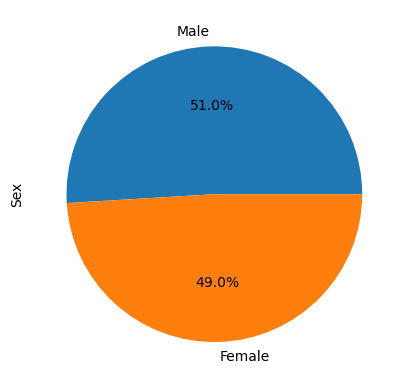

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =["Male", "Female"]
plt.pie(gender_data, labels= labels, autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
#print(last_timepoint_df)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merged_data = pd.merge(clean_df, last_timepoint_df, 
                            on = ["Mouse ID","Timepoint"], how= "inner")


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = new_merged_data.loc[new_merged_data['Drug Regimen'] == treatment, 
                                        'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_data.append(tumor_volumes)
# Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq-1.5*iqr
    upper_bound = upperq+1.5*iqr

    outliers = tumor_volumes.loc[(tumor_volumes > upper_bound) |
                             (tumor_volumes < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


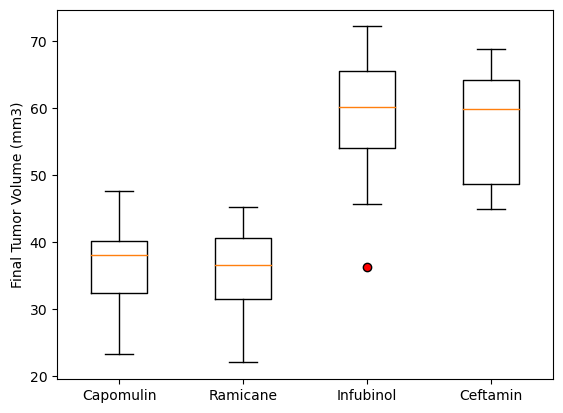

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels= treatment_list, flierprops= dict(markerfacecolor = "red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

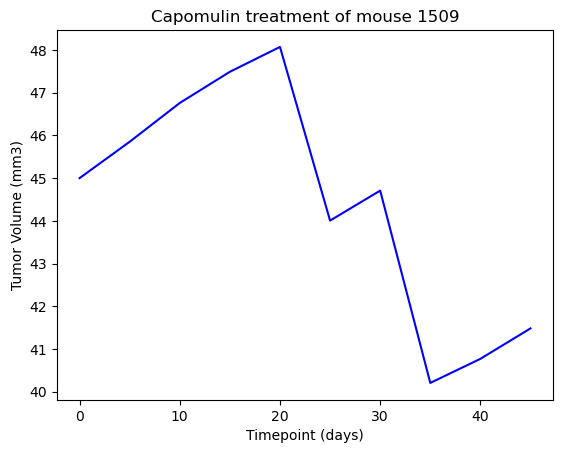

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_data = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
mouse_1509 = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "l509",:]
x_axis = mouse_1509["Timepoint"]
y_axis = mouse_1509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color = "b")
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

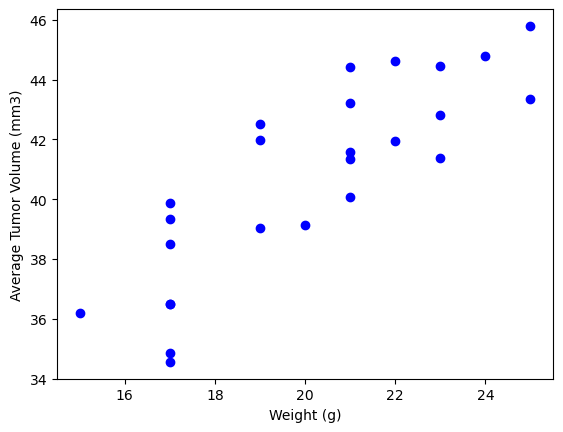

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tum_vol = Capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = Capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatter plot
plt.scatter(weight, avg_tum_vol, facecolors="blue")

#Set plot labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


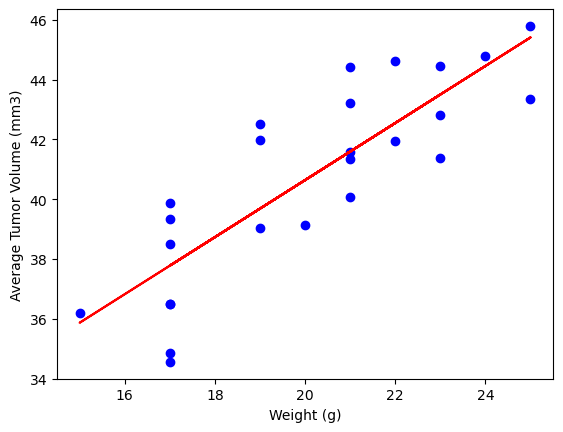

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation
correlation = st.pearsonr(weight,avg_tum_vol)[0]
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')

# Generate a scatter plot
plt.scatter(weight, avg_tum_vol, facecolors="blue")

# line regression
slope, intercept, pvalue, rvalue, stderr = st.linregress(weight,avg_tum_vol)
y = weight*slope + intercept
plt.plot(weight, y, color='r')

#Set plot labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
